In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

DATA_PATH = 'C:/Python/names/'

In [207]:
def get_names_by_year(step=1):
    names_by_year = {}
    for year in range(1900, 2000, step):
        names_by_year[year] = pd.read_csv(
            '{}yob{}.txt'.format(DATA_PATH, year),
            names=['Name','Gender','Count']          
            
        )
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    return names_all

names_all = get_names_by_year()
print (names_all.head(10))

               Name Gender  Count
Year Pos                         
1900 0         Mary      F  16706
     1        Helen      F   6343
     2         Anna      F   6114
     3     Margaret      F   5304
     4         Ruth      F   4765
     5    Elizabeth      F   4096
     6     Florence      F   3920
     7        Ethel      F   3896
     8        Marie      F   3856
     9      Lillian      F   3414


In [36]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.head(10)

Count
Year Name          
1900 Aaron      103
     Abbie      112
     Abby         7
     Abe         56
     Abel        15
     Abigail     14
     Abner       21
     Abraham    100
     Abram       18
     Abron        5

In [16]:
rob_and_ruth_stats = name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name')

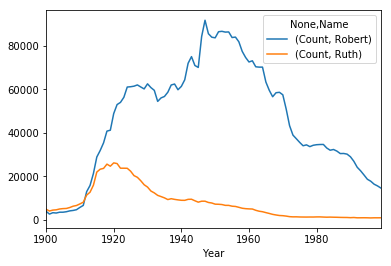

In [27]:
rob_and_ruth_stats.plot()

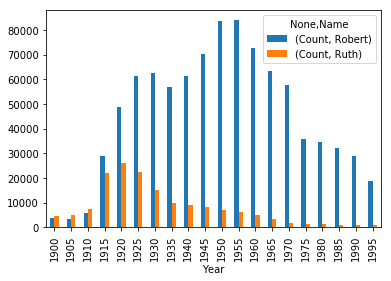

In [44]:
names = get_names_by_year(5)
get_5_year_stat = names.groupby([names.index.get_level_values(0), 'Name']).sum()
rob_and_ruth_diagram = get_5_year_stat.query('Name == ["Ruth", "Robert"]').unstack('Name')
rob_and_ruth_diagram.plot.bar()

In [89]:
year_stats = name_dynamics.query('Year == ["1950"] & Name.str[0] == ["R"]').sort_values(by='Count', ascending=False)
year_stats.head(10)

Count
Year Name          
1950 Robert   83778
     Richard  51111
     Ronald   29985
     Roger    12578
     Raymond  11218
     Rebecca   9443
     Ruth      7138
     Roy       6491
     Rita      6439
     Ralph     6421

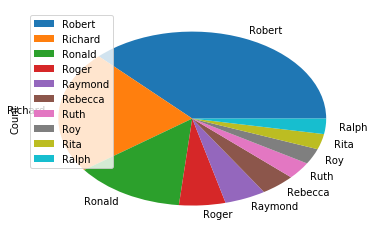

In [90]:
year_stats.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10).plot.pie(y='Count')

In [94]:
a = 'asdasde'
b = 'sde'
c = []
for i in a: 
    if i in b: 
        c.append(i)
print (len(c))

5


In [97]:
consonant = 'bcdfghjklmnpqrstvwxz'

In [201]:
def get_constonant_count(text='Aaron'):
    i = 0
    for char in text.lower():
        if char in consonant:
            i += 1
    return i
get_constonant_count('Mary')

2

In [208]:
names_consonant = names_all
names_consonant.head(5)

Name Gender  Count
Year Pos                        
1900 0        Mary      F  16706
     1       Helen      F   6343
     2        Anna      F   6114
     3    Margaret      F   5304
     4        Ruth      F   4765

In [209]:
names_consonant['Cons_count'] = names_consonant['Name'].apply(get_constonant_count)
names_consonant.head(10)

Name Gender  Count  Cons_count
Year Pos                                     
1900 0         Mary      F  16706           2
     1        Helen      F   6343           3
     2         Anna      F   6114           2
     3     Margaret      F   5304           5
     4         Ruth      F   4765           3
     5    Elizabeth      F   4096           5
     6     Florence      F   3920           5
     7        Ethel      F   3896           3
     8        Marie      F   3856           2
     9      Lillian      F   3414           4

In [245]:
name_cons_dynamics = names_consonant.groupby(['Name','Cons_count']).sum().reset_index()
name_cons_dynamics_v2 = name_cons_dynamics.rename(columns = {
    'Cons_count':'Количество согласных букв в имени',
    'Count':'Количество употреблений'
})
name_cons_dynamics_v2.head(5)

,Name,Количество согласных букв в имени,Количество употреблений
0,Aadam,2,52
1,Aadil,2,71
2,Aaditya,2,19
3,Aage,1,7
4,Aagot,2,5


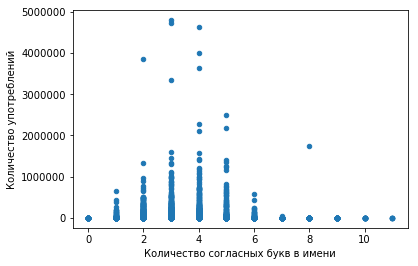

In [248]:
name_cons_dynamics_v2.plot.scatter(x='Количество согласных букв в имени', y='Количество употреблений')